In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

### Feature Selection using Pearson Correlation

In [3]:
dataset=pd.read_csv('kc_house_data.csv')
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
feature_matrix = [features for features in dataset.columns if 'price' not in features and 'yr_built' not in features and 'yr_renovated' not in features and 'date' not in features]
X = dataset[feature_matrix]
y = dataset['price']

In [5]:
feature_matrix

['id',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [6]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((15129, 17), (6484, 17))

In [7]:
X_train.corr()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.000379,0.006478,-0.014001,-0.132959,0.023856,-0.001970,0.007021,-0.027216,0.011015,-0.012300,-0.006089,-0.009697,-0.006698,0.023027,-0.007345,-0.138209
bedrooms,-0.000379,1.000000,0.514586,0.575249,0.030340,0.172916,-0.001247,0.081507,0.033101,0.358628,0.475746,0.305841,-0.152040,-0.007341,0.129457,0.392096,0.028265
bathrooms,0.006478,0.514586,1.000000,0.752353,0.085833,0.498364,0.072522,0.190218,-0.125149,0.666087,0.685287,0.281542,-0.201867,0.022677,0.224469,0.565692,0.087112
sqft_living,-0.014001,0.575249,0.752353,1.000000,0.171924,0.349807,0.114069,0.294664,-0.055371,0.762826,0.877775,0.436352,-0.201325,0.046988,0.241522,0.754554,0.181315
sqft_lot,-0.132959,0.030340,0.085833,0.171924,1.000000,-0.006659,0.024207,0.085850,-0.006916,0.113719,0.187418,0.006454,-0.130128,-0.090298,0.234061,0.143487,0.738040
floors,0.023856,0.172916,0.498364,0.349807,-0.006659,1.000000,0.028778,0.030724,-0.257658,0.458717,0.519051,-0.245529,-0.050410,0.049933,0.117878,0.271427,-0.011655
waterfront,-0.001970,-0.001247,0.072522,0.114069,0.024207,0.028778,1.000000,0.416884,0.023120,0.085511,0.081297,0.085138,0.031848,-0.014654,-0.041692,0.087126,0.033294
view,0.007021,0.081507,0.190218,0.294664,0.085850,0.030724,0.416884,1.000000,0.043210,0.259293,0.177023,0.281883,0.078455,0.004183,-0.071917,0.282763,0.080144
condition,-0.027216,0.033101,-0.125149,-0.055371,-0.006916,-0.257658,0.023120,0.043210,1.000000,-0.139368,-0.154101,0.173980,0.006588,-0.008697,-0.109886,-0.090510,-0.002707
grade,0.011015,0.358628,0.666087,0.762826,0.113719,0.458717,0.085511,0.259293,-0.139368,1.000000,0.754654,0.173096,-0.179265,0.111733,0.197989,0.709196,0.117902


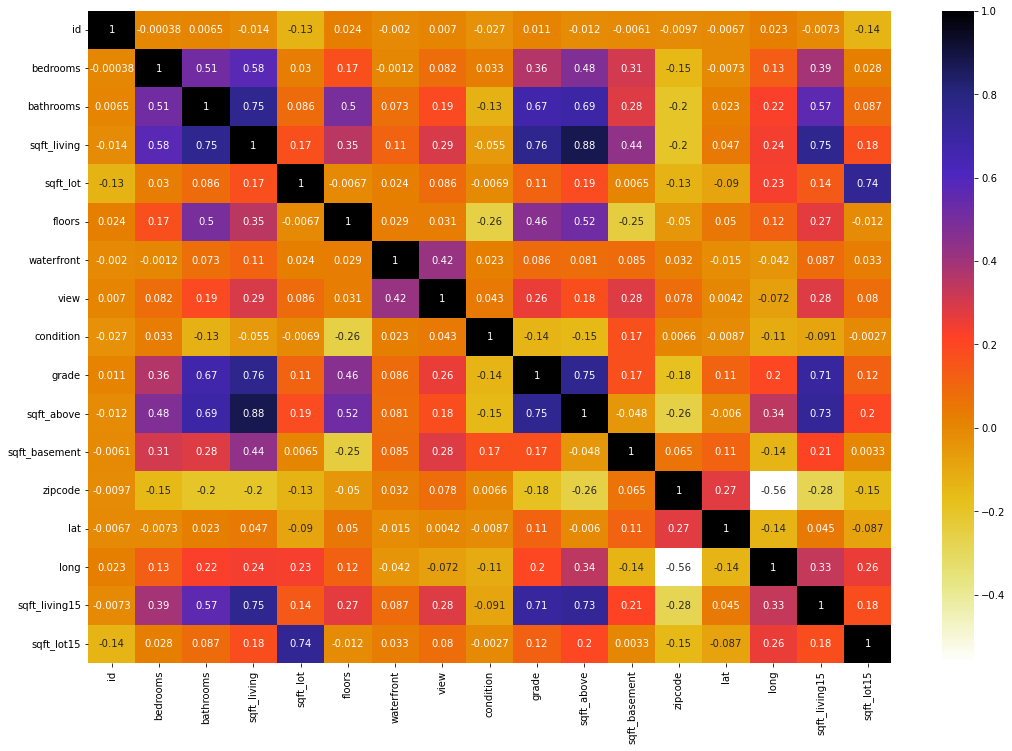

In [8]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(18,12))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [9]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [36]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

5

In [37]:
corr_features

{'grade', 'sqft_above', 'sqft_living', 'sqft_living15', 'sqft_lot15'}

In [38]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,id,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,sqft_basement,zipcode,lat,long
17384,1453602313,2,1.50,1650,3.0,0,0,3,0,98125,47.7222,-122.290
722,2225059214,4,3.25,51836,2.0,0,0,4,0,98005,47.6350,-122.164
2680,2768000270,2,0.75,3700,1.0,0,0,3,240,98107,47.6707,-122.364
18754,6819100040,2,1.00,2640,1.0,0,0,4,0,98109,47.6438,-122.357
14554,4027700666,4,2.50,9603,2.0,0,2,3,0,98155,47.7717,-122.277
...,...,...,...,...,...,...,...,...,...,...,...,...
18588,4389200761,3,2.25,8570,1.0,0,0,5,480,98004,47.6155,-122.210
6784,6819100345,4,1.75,6000,1.0,0,0,3,1080,98109,47.6465,-122.357
14510,5112800234,3,2.50,25705,1.5,0,0,3,0,98058,47.4514,-122.089
18917,3832710210,3,1.75,8009,1.0,0,0,3,500,98032,47.3657,-122.280


### Prediction House Sales Prices

In [39]:
# Train a simple linear regression model
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

In [40]:
regr = linear_model.LinearRegression()

In [41]:
regr.fit(X_train, y_train)
print(regr.predict(X_test))

[ 448694.24257454 1499799.4308852   471137.06722744 ...  294102.42387117
  248745.20227047  179298.35485348]


In [42]:
regr.score(X_test,y_test)

0.6638431777482805

In [43]:
import math

# Calculate the Root Mean Squared Error
print("RMSE: %.2f"
      % math.sqrt(np.mean((regr.predict(X_test) - y_test) ** 2)))

RMSE: 214829.30


In [44]:
# import sys 
# !{sys.executable} -m pip install xgboost

In [45]:
import xgboost as xgb

In [46]:
# Let's try XGboost algorithm to see if we can get better results
XGB = xgb.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

In [47]:
traindf, testdf = train_test_split(X_train, test_size = 0.3)
XGB.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.08, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score

predictions = XGB.predict(X_test)
print(explained_variance_score(predictions,y_test))

0.8781917054513367
